In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [94]:
import keras
from keras.models import Sequential #define neural model
from keras.layers import Dense #connect precedent layers to subsequent layers
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [95]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]] #central coordinates for our cluster dataset
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

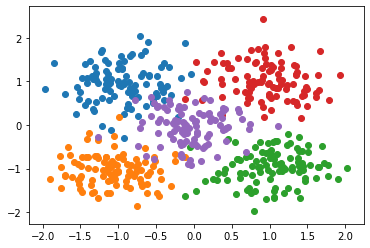

In [96]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [97]:
y_cat = to_categorical(y, 5)
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [98]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2, ), activation='softmax')) #multiclass data
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [99]:
model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
500/500 [==============================] - 1s 1ms/step - loss: 0.8655 - acc: 0.7640
Epoch 2/100
500/500 [==============================] - 0s 43us/step - loss: 0.4802 - acc: 0.8760
Epoch 3/100
500/500 [==============================] - 0s 43us/step - loss: 0.3489 - acc: 0.9260
Epoch 4/100
500/500 [==============================] - 0s 46us/step - loss: 0.2853 - acc: 0.9440
Epoch 5/100
500/500 [==============================] - 0s 41us/step - loss: 0.2516 - acc: 0.9420
Epoch 6/100
500/500 [==============================] - 0s 41us/step - loss: 0.2340 - acc: 0.9460
Epoch 7/100
500/500 [==============================] - 0s 40us/step - loss: 0.2199 - acc: 0.9460
Epoch 8/100
500/500 [==============================] - 0s 39us/step - loss: 0.2098 - acc: 0.9480
Epoch 9/100
500/500 [==============================] - 0s 41us/step - loss: 0.2010 - acc: 0.9500
Epoch 10/100
500/500 [==============================] - 0s 40us/step - loss: 0.1952 - acc: 0.9440
Epoch 11/100
500/500 [========

In [100]:
# plot our dataset along with our decision boundary that will seperate our categorical results
def plot_decision_boundary(X, y, model): # Model is our sequential model containing the neural network data
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 50)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 50) 
    xx, yy = np.meshgrid(x_span, y_span) # return coordinate matrices from the input of the coordinate vectors (x_span & y_span)
    xx_, yy_ = xx.ravel(), yy.ravel() # make matrix 1D
    grid = np.c_[xx_, yy_]# concat these arrays in a column-wise arrangment
    pred_func = model.predict_classes(grid) #tests all points in grid and returns array of predictions indicates Pr(any given pt being labeled as 1)
    z = pred_func.reshape(xx.shape) # same dimensions as xx, insures the prediction results are compatible with the appropriate coordinate counterpart of our grid
    plt.contourf(xx, yy, z) # plot distinct probability level/contour zones

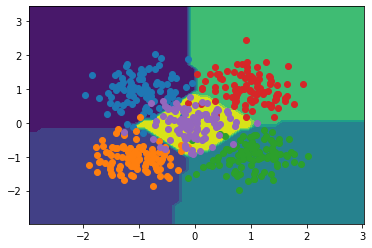

In [101]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1]) #purple
plt.scatter(X[y==1, 0], X[y==1, 1]) #blue
plt.scatter(X[y==2, 0], X[y==2, 1]) #yellow
plt.scatter(X[y==3, 0], X[y==3, 1]) #
plt.scatter(X[y==4, 0], X[y==4, 1]) #

Prediction is [3]


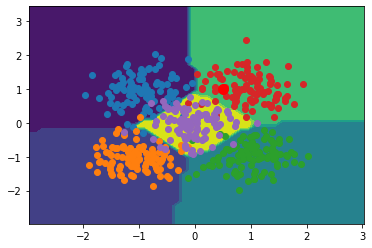

In [102]:
#predict
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1]) 
plt.scatter(X[y==1, 0], X[y==1, 1]) 
plt.scatter(X[y==2, 0], X[y==2, 1]) 
plt.scatter(X[y==3, 0], X[y==3, 1]) 
plt.scatter(X[y==4, 0], X[y==4, 1]) 
x = 0.5
y = 1
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color='r')
print("Prediction is", prediction)